# Exploratory Data Analysis
Author: Karina Condeixa
__________________________________________

In [9]:
# import packages
import pandas as pd
# from faker import Faker, providers
# from faker.providers.address.de_DE import Provider as DeDeAddressProvider
# from faker.generator import random
# from faker.providers import BaseProvider
# import random

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# %matplotlib notebook
# %matplotlib 

# import folium
# from geopy.geocoders import Nominatim

In [10]:
item_df_original = pd.read_csv('data/item_df.csv')
# item_df_original = item_df_original[:][1:].squeeze()
item_df_original.head()

,item_category,item_condition,item_postcode,item_timer_days,n_views,n_likes,item_id
0,plants,3,12619,11,101,4,1
1,plants,2,10249,10,90,13,2
2,plants,2,13589,28,9,1,3
3,furniture,3,13159,17,116,8,4
4,kids,3,10318,5,161,20,5


In [13]:
item_df = item_df_original.copy()

## EDA

In [14]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   item_category    1500 non-null   object
 1   item_condition   1500 non-null   int64 
 2   item_postcode    1500 non-null   int64 
 3   item_timer_days  1500 non-null   int64 
 4   n_views          1500 non-null   int64 
 5   n_likes          1500 non-null   int64 
 6   item_id          1500 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 82.2+ KB


Text(0.5, 0, 'Frequency')

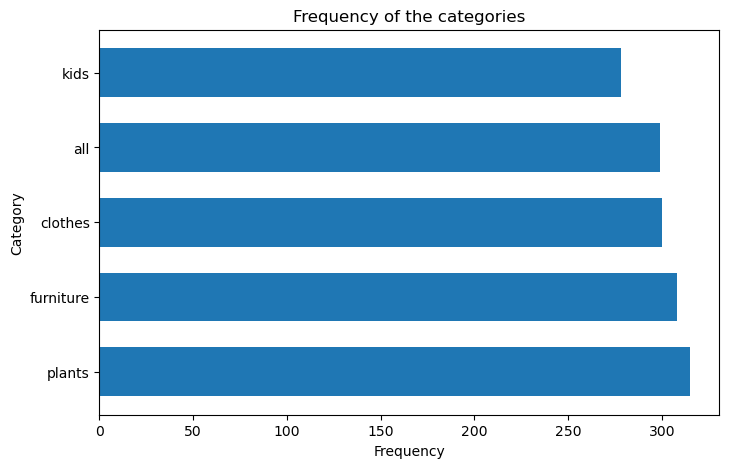

In [15]:
ax = item_df['item_category'].value_counts().plot(kind='barh', 
                                                   figsize=(8,5), 
                                                  width=.65)                                         
                                                                                       
ax.set_title("Frequency of the categories")
ax.set_ylabel("Category")
ax.set_xlabel("Frequency") 

Text(0.5, 0, 'Frequency')

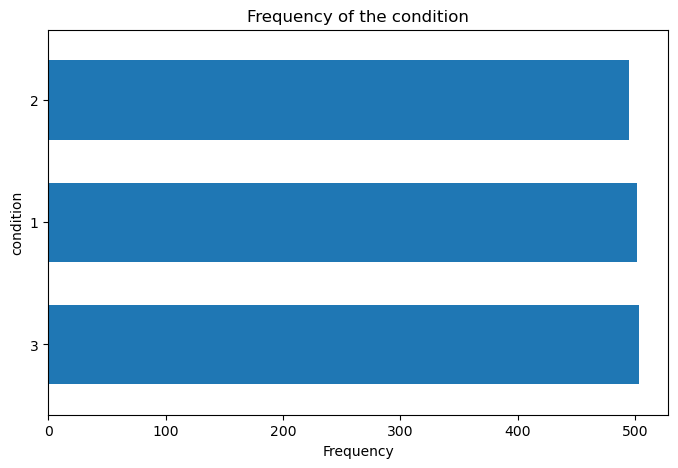

In [16]:
ax = item_df['item_condition'].value_counts().plot(kind='barh', 
                                                   figsize=(8,5), 
                                                  width=.65)                                         
                                                                                       
ax.set_title("Frequency of the condition")
ax.set_ylabel("condition")
ax.set_xlabel("Frequency")

In [17]:
transform_col_to_num = ['item_condition',  'n_views', 'n_likes', 'item_timer_days']

item_df[transform_col_to_num] = item_df[transform_col_to_num].astype(str).astype(int)
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   item_category    1500 non-null   object
 1   item_condition   1500 non-null   int64 
 2   item_postcode    1500 non-null   int64 
 3   item_timer_days  1500 non-null   int64 
 4   n_views          1500 non-null   int64 
 5   n_likes          1500 non-null   int64 
 6   item_id          1500 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 82.2+ KB


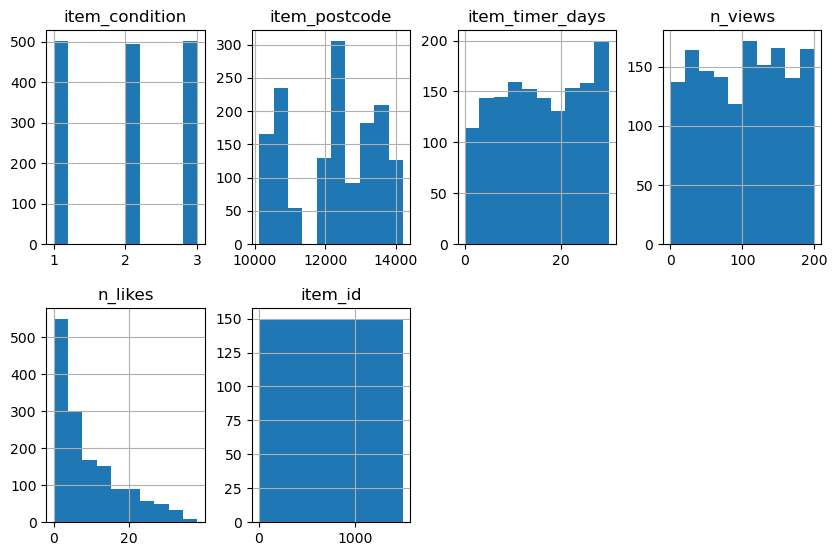

In [18]:
# check distributions
df = item_df
hist = df.hist(figsize=(10,10),layout=(3,4))

The number of likes is righ-skewed distribution. Since the fake data are random, the distrubutions are not being explained here.

/var/folders/xs/pmxwbppj14b4v76l4llp17n80000gp/T/ipykernel_41540/4174773288.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = item_df.corr()


<Axes: >

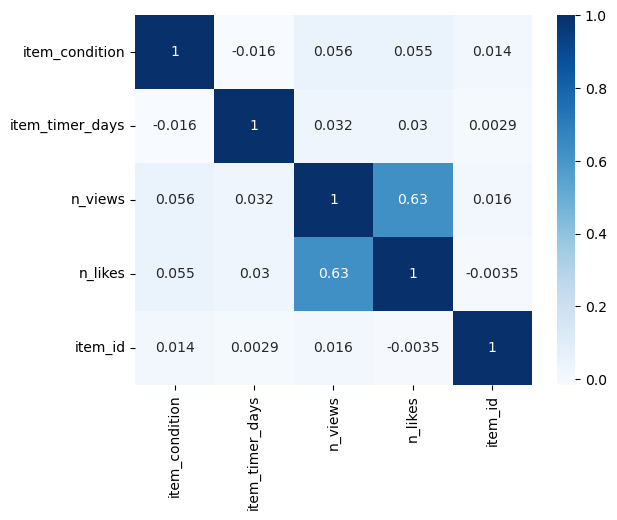

In [187]:
#correlations
corr = item_df.corr()
# corr.style.background_gradient(cmap='blues')
sb.heatmap(corr, cmap="Blues", annot=True)

There are no correlation between variables, except the numbers of likes and views.

## Feature engineering


### Since the dataset is fake, there is no nulls on it.

### One-hot Encoding 

Function to convert categorical variations to numerical ones. The results 0 indicates non-existent while 1 indicates existent.

In [188]:
# columnsToEncode= ['item_category', 'item_condition']

# item_onehot = pd.get_dummies(item_df,columns=columnsToEncode, drop_first=True)
# item_onehot

In [196]:

item_cat_onehot = pd.get_dummies(item_df[['item_category']], prefix="cat", prefix_sep="_")
item_cat_onehot 

# add neighborhood column back to dataframe
item_cat_onehot['item_postcode'] = item_df['item_postcode'] 

# move neighborhood column to the first column
fixed_columns = [item_cat_onehot.columns[-1]] + list(item_cat_onehot.columns[:-1])
item_cat_onehot = item_cat_onehot[fixed_columns]


item_cat_grouped = item_cat_onehot.groupby('item_postcode').mean().reset_index()

# item_onehot.head()

item_cat_grouped.head()

,cat_all,cat_clothes,cat_furniture,cat_kids,cat_plants
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
1495,0,0,0,0,1
1496,1,0,0,0,0
1497,0,0,1,0,0
1498,0,0,1,0,0


In [190]:

# item_onehot = pd.get_dummies(item_df[['item_category']], prefix="cat", prefix_sep="_")
# item_onehot 

# # add neighborhood column back to dataframe
# item_onehot['item_postcode'] = item_df['item_postcode'] 

# # move neighborhood column to the first column
# fixed_columns = [item_onehot.columns[-1]] + list(item_onehot.columns[:-1])
# item_onehot = item_onehot[fixed_columns]

# item_grouped = item_onehot.groupby('item_postcode').mean().reset_index()

# # item_onehot.head()

# item_grouped.head()

In [209]:
item_df['item_condition'] = item_df['item_condition'].astype(str)

In [210]:
item_cond_onehot = pd.get_dummies(item_df[['item_condition']], prefix="condition", prefix_sep="_")
item_cond_onehot 

# add postcode column back to dataframe
item_cond_onehot['item_postcode'] = item_df['item_postcode'] 

# move neighborhood column to the first column
fixed_columns = [item_cond_onehot.columns[-1]] + list(item_cond_onehot.columns[:-1])
item_cond_onehot = item_cond_onehot[fixed_columns]

item_cond_grouped = item_cond_onehot.groupby('item_postcode').mean().reset_index()

item_onehot.head()

item_cond_grouped.head()

,item_postcode,condition_1,condition_2,condition_3
0,10119,0.250000,0.375000,0.375000
1,10178,0.285714,0.428571,0.285714
2,10179,0.142857,0.285714,0.571429
3,10243,0.375000,0.125000,0.500000
4,10245,0.600000,0.000000,0.400000


#### Sorting

In [211]:

def return_most_common_items(row, num_top_items):
    row_items = row.iloc[1:]
    row_items_sorted = row_items.sort_values(ascending=False)

    return row_items_sorted.index.values[0:num_top_items]



### Top items by postcode

In [218]:
num_top_items = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['item_postcode']

for ind in np.arange(num_top_items):
    try:
        columns.append('{}{} Most Common Items'.format(ind+1, indicators[ind]))  
    except:
        columns.append('{}th Most Common Items'.format(ind+1))  

# create a new dataframe
postcodes_cat_sorted = pd.DataFrame(columns=columns)
postcodes_cat_sorted['item_postcode'] = item_cat_grouped['item_postcode']


# for ind in np.arange(item_grouped.shape[0]):
# #     print(postcodes_items_sorted.iloc[ind, 1:]) 
# #     print(return_most_common_items(item_grouped.iloc[ind, :], num_top_venues))
#     postcodes_items_sorted.iloc[ind, 1:] = return_most_common_items(item_grouped.iloc[ind, :], num_top_items)

for ind in np.arange(item_cat_grouped.shape[0]):
    postcodes_cat_sorted.iloc[ind, 1:] = return_most_common_items(item_cat_grouped.iloc[ind, :], num_top_items)

In [219]:
postcodes_cat_sorted.head()

,item_postcode,1st Most Common Items,2nd Most Common Items,3rd Most Common Items,4th Most Common Items,5th Most Common Items
0,10119,cat_kids,cat_plants,cat_all,cat_furniture,cat_clothes
1,10178,cat_all,cat_clothes,cat_furniture,cat_kids,cat_plants
2,10179,cat_all,cat_clothes,cat_furniture,cat_kids,cat_plants
3,10243,cat_plants,cat_clothes,cat_all,cat_kids,cat_furniture
4,10245,cat_kids,cat_plants,cat_all,cat_clothes,cat_furniture


In [220]:
num_top_items = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['item_postcode']

for ind in np.arange(num_top_items):
    try:
        columns.append('{}{} Most Common Items'.format(ind+1, indicators[ind]))  
    except:
        columns.append('{}th Most Common Items'.format(ind+1))  

# create a new dataframe
postcodes_cond_sorted = pd.DataFrame(columns=columns)
postcodes_cond_sorted['item_postcode'] = item_grouped['item_postcode']


# for ind in np.arange(item_grouped.shape[0]):
# #     print(postcodes_items_sorted.iloc[ind, 1:]) 
# #     print(return_most_common_items(item_grouped.iloc[ind, :], num_top_venues))
#     postcodes_items_sorted.iloc[ind, 1:] = return_most_common_items(item_grouped.iloc[ind, :], num_top_items)

for ind in np.arange(item_grouped.shape[0]):
    postcodes_cond_sorted.iloc[ind, 1:] = return_most_common_items(item_cond_grouped.iloc[ind, :], num_top_items)

In [221]:
postcodes_cond_sorted.head()

,item_postcode,1st Most Common Items,2nd Most Common Items,3rd Most Common Items
0,10119,condition_2,condition_3,condition_1
1,10178,condition_2,condition_1,condition_3
2,10179,condition_3,condition_2,condition_1
3,10243,condition_3,condition_1,condition_2
4,10245,condition_1,condition_3,condition_2


### Cluster postcodes

k-means is used to cluster the postcodes into 5 clusters.

In [195]:
# set number of clusters
kclusters = 5

berlin_grouped_clustering = berlin_grouped.drop('neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

NameError: name 'berlin_grouped' is not defined

### Cosine similarity
to calculate user-user and item-item similarities

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Example vectors
A = np.array([1, 2, 3])
B = np.array([4, 5, 6])

# Reshape the vectors into 2D arrays
A = A.reshape(1, -1)
B = B.reshape(1, -1)

# Calculate cosine similarity
cosine_similarity = cosine_similarity(A, B)

print(cosine_similarity)


In [ ]:
## CONTINUE FROM HERE: factorization matrix, encoding

### To the Model

In [ ]:
# model_mock_df = pd.DataFrame(create_model_data(1500)).transpose()
# # model_mock_df.head(5)
# model_mock_df.shape

In [ ]:
# model_mock_df.info()

### Creating csv files

In [ ]:
# user_mock_df.to_csv('data/user_mock_data.csv', index=False)

In [ ]:
# item_mock_df.to_csv('data/item_mock_data.csv', index=False)

In [ ]:
# model_mock_df.to_csv('data/model_mock_data.csv', index=False)

## References:
- [Generate custom datasets using Python Faker](https://blogs.sap.com/2021/05/26/generate-custom-datasets-using-python-faker/)
- [folium_polygon_rectangle_layers](https://www.youtube.com/watch?v=9E9FTJrOJ1E&t=752s)
- [Faker](https://github.com/joke2k/faker/issues/1183)
- [Generating Mock Data with Python! (NumPy, Pandas, & Datetime Libraries)](https://www.youtube.com/watch?v=VJBY2eVtf7o)